In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [31]:
data=pd.read_csv('CrimeData.csv')
data.head(25)

,Report Number,Offense ID,Offense Start DateTime,Offense End DateTime,Report DateTime,Group A B,Crime Against Category,Offense Parent Group,Offense,Offense Code,Precinct,Sector,Beat,MCPP,100 Block Address,Longitude,Latitude
0,2020-044620,12605873663,02/05/2020 10:10:00 AM,NaN,02/05/2020 11:24:31 AM,A,SOCIETY,DRUG/NARCOTIC OFFENSES,Drug/Narcotic Violations,35A,W,Q,Q1,MAGNOLIA,32XX BLOCK OF 23RD AVE W,-122.385974,47.649387
1,2020-044452,12605598696,02/03/2020 08:00:00 AM,02/04/2020 08:00:00 AM,02/05/2020 10:06:28 AM,A,PROPERTY,LARCENY-THEFT,Theft of Motor Vehicle Parts or Accessories,23G,N,J,J3,ROOSEVELT/RAVENNA,63XX BLOCK OF 5TH AVE NE,-122.323399,47.675118
2,2020-044465,12605567653,02/02/2020 08:30:00 PM,02/02/2020 09:30:00 PM,02/05/2020 09:39:33 AM,A,PROPERTY,ROBBERY,Robbery,120,N,U,U3,ROOSEVELT/RAVENNA,26TH AVE NE / NE BLAKELEY ST,-122.299552,47.666384
3,2020-044225,12605174036,02/05/2020 01:17:00 AM,02/05/2020 02:21:00 AM,02/05/2020 03:30:55 AM,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,W,Q,Q1,MAGNOLIA,22XX BLOCK OF W RAYE ST,-122.384865,47.642927
4,2020-044076,12605081469,02/05/2020 12:51:21 AM,NaN,02/05/2020 12:51:31 AM,B,SOCIETY,DRIVING UNDER THE INFLUENCE,Driving Under the Influence,90D,N,B,B2,BALLARD SOUTH,NW 46TH ST / 8TH AVE NW,-122.366195,47.662193
5,2020-044142,12605077150,02/04/2020 10:59:00 PM,NaN,02/05/2020 12:45:08 AM,A,PROPERTY,LARCENY-THEFT,Shoplifting,23C,W,M,M1,DOWNTOWN COMMERCIAL,14XX BLOCK OF 2ND AVE,-122.338450,47.608789
6,2020-044104,12605029468,02/04/2020 08:30:00 PM,02/04/2020 08:45:00 PM,02/04/2020 11:31:52 PM,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,N,J,J3,PHINNEY RIDGE,71XX BLOCK OF GREENWOOD AVE N,-122.355309,47.680527
7,2020-043988,12604995759,02/04/2020 07:58:00 PM,NaN,02/04/2020 10:46:19 PM,A,PROPERTY,LARCENY-THEFT,Shoplifting,23C,SW,F,F2,ROXHILL/WESTWOOD/ARBOR HEIGHTS,26XX BLOCK OF SW BARTON ST,-122.367312,47.521028
8,2020-043928,12604963106,02/04/2020 07:01:00 PM,NaN,02/04/2020 09:59:07 PM,B,SOCIETY,DRIVING UNDER THE INFLUENCE,Driving Under the Influence,90D,N,L,L2,NORTHGATE,15TH AVE NE / NE 95TH ST,-122.312078,47.697616
9,2020-044065,12605008517,02/04/2020 09:00:00 PM,02/04/2020 09:15:00 PM,02/04/2020 09:47:32 PM,A,PROPERTY,LARCENY-THEFT,Theft From Motor Vehicle,23F,E,E,E2,CAPITOL HILL,15XX BLOCK OF 12TH AVE,-122.316845,47.614684


In [32]:
data.columns = data.columns.str.replace(" ", "_")

# strip any invisible white spaces
data.columns = data.columns.str.strip()

# Set all columns names to lower case
data.columns = data.columns.str.lower()

In [33]:
data['offense_start_datetime']=pd.to_datetime(data['offense_start_datetime'])
data['offense_end_datetime']=pd.to_datetime(data['offense_end_datetime'],errors = 'coerce')
data['report_datetime']=pd.to_datetime(data['report_datetime'])


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970938 entries, 0 to 970937
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   report_number           970938 non-null  object        
 1   offense_id              970938 non-null  int64         
 2   offense_start_datetime  969962 non-null  datetime64[ns]
 3   offense_end_datetime    537164 non-null  datetime64[ns]
 4   report_datetime         970938 non-null  datetime64[ns]
 5   group_a_b               970938 non-null  object        
 6   crime_against_category  970938 non-null  object        
 7   offense_parent_group    970938 non-null  object        
 8   offense                 970938 non-null  object        
 9   offense_code            970938 non-null  object        
 10  precinct                970934 non-null  object        
 11  sector                  970936 non-null  object        
 12  beat                    970936

In [35]:
drop_columns=['offense','beat','100_block_address']
data=data.drop(drop_columns,axis=1)

In [36]:
data['year'] = data.offense_start_datetime.dt.year
data['hour'] = data['offense_start_datetime'].dt.hour
data['month'] = data.offense_start_datetime.dt.month

In [37]:
data['year'] = data['year'].astype('Int64')
data['hour'] = data['hour'].astype('Int64')
data['month'] = data['month'].astype('Int64')

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970938 entries, 0 to 970937
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   report_number           970938 non-null  object        
 1   offense_id              970938 non-null  int64         
 2   offense_start_datetime  969962 non-null  datetime64[ns]
 3   offense_end_datetime    537164 non-null  datetime64[ns]
 4   report_datetime         970938 non-null  datetime64[ns]
 5   group_a_b               970938 non-null  object        
 6   crime_against_category  970938 non-null  object        
 7   offense_parent_group    970938 non-null  object        
 8   offense_code            970938 non-null  object        
 9   precinct                970934 non-null  object        
 10  sector                  970936 non-null  object        
 11  mcpp                    970938 non-null  object        
 12  longitude               970938

In [39]:
data['hour'].isnull().sum()

976

In [40]:
data.drop(data[data['hour'].isnull()].index, inplace = True)

# I have classified the time of the day based on the hour and created a new column named Time of Day , which is my target variable. To check which part of the day is more 

In [41]:
data['Time of Day'] = ['DAY' if 6<=x<=18 else 'NIGHT' if 18<x<23 else 'MIDNIGHT' for x in data['hour']]
data.head(10)

,report_number,offense_id,offense_start_datetime,offense_end_datetime,report_datetime,group_a_b,crime_against_category,offense_parent_group,offense_code,precinct,sector,mcpp,longitude,latitude,year,hour,month,Time of Day
0,2020-044620,12605873663,2020-02-05 10:10:00,NaT,2020-02-05 11:24:31,A,SOCIETY,DRUG/NARCOTIC OFFENSES,35A,W,Q,MAGNOLIA,-122.385974,47.649387,2020,10,2,DAY
1,2020-044452,12605598696,2020-02-03 08:00:00,2020-02-04 08:00:00,2020-02-05 10:06:28,A,PROPERTY,LARCENY-THEFT,23G,N,J,ROOSEVELT/RAVENNA,-122.323399,47.675118,2020,8,2,DAY
2,2020-044465,12605567653,2020-02-02 20:30:00,2020-02-02 21:30:00,2020-02-05 09:39:33,A,PROPERTY,ROBBERY,120,N,U,ROOSEVELT/RAVENNA,-122.299552,47.666384,2020,20,2,NIGHT
3,2020-044225,12605174036,2020-02-05 01:17:00,2020-02-05 02:21:00,2020-02-05 03:30:55,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,290,W,Q,MAGNOLIA,-122.384865,47.642927,2020,1,2,MIDNIGHT
4,2020-044076,12605081469,2020-02-05 00:51:21,NaT,2020-02-05 00:51:31,B,SOCIETY,DRIVING UNDER THE INFLUENCE,90D,N,B,BALLARD SOUTH,-122.366195,47.662193,2020,0,2,MIDNIGHT
5,2020-044142,12605077150,2020-02-04 22:59:00,NaT,2020-02-05 00:45:08,A,PROPERTY,LARCENY-THEFT,23C,W,M,DOWNTOWN COMMERCIAL,-122.338450,47.608789,2020,22,2,NIGHT
6,2020-044104,12605029468,2020-02-04 20:30:00,2020-02-04 20:45:00,2020-02-04 23:31:52,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,290,N,J,PHINNEY RIDGE,-122.355309,47.680527,2020,20,2,NIGHT
7,2020-043988,12604995759,2020-02-04 19:58:00,NaT,2020-02-04 22:46:19,A,PROPERTY,LARCENY-THEFT,23C,SW,F,ROXHILL/WESTWOOD/ARBOR HEIGHTS,-122.367312,47.521028,2020,19,2,NIGHT
8,2020-043928,12604963106,2020-02-04 19:01:00,NaT,2020-02-04 21:59:07,B,SOCIETY,DRIVING UNDER THE INFLUENCE,90D,N,L,NORTHGATE,-122.312078,47.697616,2020,19,2,NIGHT
9,2020-044065,12605008517,2020-02-04 21:00:00,2020-02-04 21:15:00,2020-02-04 21:47:32,A,PROPERTY,LARCENY-THEFT,23F,E,E,CAPITOL HILL,-122.316845,47.614684,2020,21,2,NIGHT


# Target Variable

<AxesSubplot:>

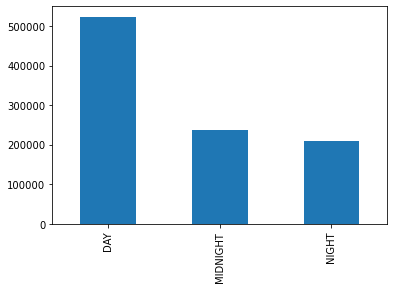

In [42]:
from matplotlib import pyplot as plt
data['Time of Day'].value_counts().plot.bar()


# From above plot we can say that the column has lots of imbalances in data as the day category are arounf 5000000 whereas the midnight and night categories are almost 200000

# Modelling

Splitting the dataset for train and test datas.

In [43]:
from sklearn.model_selection import train_test_split
features = ['crime_against_category','offense_parent_group','offense_code','mcpp','year','hour']

X = data[features]
y = data['Time of Day']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=124)

print(f'Training data: {X_train.shape[0]:,}')
print(f'Test data: {X_test.shape[0]:,}')
print('\nFeatures:')
print(*X_train.columns, sep='\n')

Training data: 775,969
Test data: 193,993

Features:
crime_against_category
offense_parent_group
offense_code
mcpp
year
hour


In [44]:
numericalFeatures = ['year','hour']

categoricalFeatures = ['crime_against_category','offense_parent_group','offense_code','mcpp']


I have considered the median for numerical pipeline and most-frequent for categorical pipeline, Also OnehotEncoder

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([('impute_missing', SimpleImputer(strategy='median')),
                           ('standardize_num', StandardScaler())
                        ])

cat_pipeline = Pipeline([('impute_missing_cats', SimpleImputer(strategy='most_frequent')),
                          ('create_dummies_cats', OneHotEncoder(handle_unknown='ignore', drop='first'))])

processing_pipeline = ColumnTransformer(transformers=[('proc_numeric', num_pipeline, numericalFeatures),
                                                      ('create_dummies', cat_pipeline, categoricalFeatures)])
print(processing_pipeline)

ColumnTransformer(transformers=[('proc_numeric',
                                 Pipeline(steps=[('impute_missing',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardize_num',
                                                  StandardScaler())]),
                                 ['year', 'hour']),
                                ('create_dummies',
                                 Pipeline(steps=[('impute_missing_cats',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('create_dummies_cats',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 ['crime_against_category',
                                  'offense_parent_group', 'offense_code',
            

# Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

lr_pipeline = Pipeline([('processing pipeline', processing_pipeline), 
              ('lg', LogisticRegression(solver = 'liblinear'))
             ])

params = {'lg__C': [0.05, 0.08, 0.1, 0.12, 0.15],'lg__penalty':['l2', 'none']}
grid_search = GridSearchCV(lr_pipeline, param_grid=params, scoring='f1_weighted', cv=10, refit=True)
grid_search = grid_search.fit(X_train, y_train)

print(grid_search.best_estimator_)
print("\n")
print(f'Validation score: {grid_search.best_score_:.2%}')
print(f'Test score: {grid_search.score(X_test, y_test):.2%}')

Pipeline(steps=[('processing pipeline',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['year', 'hour']),
                                                 ('create_dummies',
                                                  Pipeline(steps=[('impute_missing_cats',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('create_dummies_cats',
                                                                   OneHotEncoder(drop='first',
            

In the above model I have used f1_weighted metric because their are more imbalance in the data


The model picked the classlabel which is 0.05 for best validation score.


In [49]:
lg_results = list(zip(grid_search.cv_results_['params'],
                      grid_search.cv_results_['mean_test_score'],
                      grid_search.cv_results_['std_test_score']
                     )
                 )

noRegCount = 0
for i in lg_results:
    x = i[0]['lg__C']
    y = i[0]['lg__penalty']
    if y == 'none' and noRegCount < 1:
        print(f'No Regularization:, lower acc: {(i[1]-i[2]):.2%}, mean acc: {i[1]:.2%}, upper acc: {(i[1]+i[2]):.2%}')
        noRegCount += 1
    if y == 'l2':
        print(f'Regularization: {x}, lower acc: {(i[1]-i[2]):.2%}, mean acc:{i[1]:.2%}, upper acc: {(i[1]+i[2]):.2%}')

Regularization: 0.05, lower acc: 83.35%, mean acc:83.54%, upper acc: 83.72%
No Regularization:, lower acc: nan%, mean acc: nan%, upper acc: nan%
Regularization: 0.08, lower acc: 83.34%, mean acc:83.53%, upper acc: 83.71%
Regularization: 0.1, lower acc: 83.34%, mean acc:83.52%, upper acc: 83.70%
Regularization: 0.12, lower acc: 83.33%, mean acc:83.52%, upper acc: 83.70%
Regularization: 0.15, lower acc: 83.33%, mean acc:83.51%, upper acc: 83.70%


from hyperparameter tuning, we can say that C=0.05 has higher accuracy compared to other class labels.

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

lr_pipeline = Pipeline([('processing pipeline', processing_pipeline), 
              ('lg', LogisticRegression(solver = 'liblinear'))
             ])

params = {'lg__C': [0.01,0.03, 0.05, 0.1],'lg__penalty':['l2', 'none']}
grid_search = GridSearchCV(lr_pipeline, param_grid=params, scoring='f1_weighted', cv=10, refit=True)
grid_search = grid_search.fit(X_train, y_train)

print(grid_search.best_estimator_)
print("\n")
print(f'Validation score: {grid_search.best_score_:.2%}')
print(f'Test score: {grid_search.score(X_test, y_test):.2%}')

Pipeline(steps=[('processing pipeline',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['year', 'hour']),
                                                 ('create_dummies',
                                                  Pipeline(steps=[('impute_missing_cats',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('create_dummies_cats',
                                                                   OneHotEncoder(drop='first',
            

 The model picks C values as 0.01 for validation. Here we can observe that the validation score and test score has increased by 7% compared to previous class label

In [56]:
lg_results = list(zip(grid_search.cv_results_['params'],
                      grid_search.cv_results_['mean_test_score'],
                      grid_search.cv_results_['std_test_score']
                     )
                 )

noRegCount = 0
for i in lg_results:
    x = i[0]['lg__C']
    y = i[0]['lg__penalty']
    if y == 'none' and noRegCount < 1:
        print(f'No Regularization:, lower acc: {(i[1]-i[2]):.2%}, mean acc: {i[1]:.2%}, upper acc: {(i[1]+i[2]):.2%}')
        noRegCount += 1
    if y == 'l2':
        print(f'Regularization: {x}, lower acc: {(i[1]-i[2]):.2%}, mean acc:{i[1]:.2%}, upper acc: {(i[1]+i[2]):.2%}')

Regularization: 0.01, lower acc: 83.42%, mean acc:83.61%, upper acc: 83.80%
No Regularization:, lower acc: nan%, mean acc: nan%, upper acc: nan%
Regularization: 0.03, lower acc: 83.37%, mean acc:83.56%, upper acc: 83.74%
Regularization: 0.05, lower acc: 83.35%, mean acc:83.54%, upper acc: 83.72%
Regularization: 0.1, lower acc: 83.34%, mean acc:83.52%, upper acc: 83.70%


By hyperparameter tuning, the highest accuracy is 83.80 percent for C=0.01, even the standard deviation is also high for this class label. lets search around 0.01 to determine if that is the best.

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

lr_pipeline = Pipeline([('processing pipeline', processing_pipeline), 
              ('lg', LogisticRegression(solver = 'liblinear'))
             ])

params = {'lg__C': [0.001,0.01,0.05],'lg__penalty':['l2', 'none']}
grid_search = GridSearchCV(lr_pipeline, param_grid=params, scoring='f1_weighted', cv=10, refit=True)
grid_search = grid_search.fit(X_train, y_train)

print(grid_search.best_estimator_)
print("\n")
print(f'Validation score: {grid_search.best_score_:.2%}')
print(f'Test score: {grid_search.score(X_test, y_test):.2%}')

Pipeline(steps=[('processing pipeline',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['year', 'hour']),
                                                 ('create_dummies',
                                                  Pipeline(steps=[('impute_missing_cats',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('create_dummies_cats',
                                                                   OneHotEncoder(drop='first',
            

The model picked c values as 0.001, also the validation and test scores have increased to 12% and 17% respectively when compared which C=0.01. 

In [59]:
lg_results = list(zip(grid_search.cv_results_['params'],
                      grid_search.cv_results_['mean_test_score'],
                      grid_search.cv_results_['std_test_score']
                     )
                 )

noRegCount = 0
for i in lg_results:
    x = i[0]['lg__C']
    y = i[0]['lg__penalty']
    if y == 'none' and noRegCount < 1:
        print(f'No Regularization:, lower acc: {(i[1]-i[2]):.2%}, mean acc: {i[1]:.2%}, upper acc: {(i[1]+i[2]):.2%}')
        noRegCount += 1
    if y == 'l2':
        print(f'Regularization: {x}, lower acc: {(i[1]-i[2]):.2%}, mean acc:{i[1]:.2%}, upper acc: {(i[1]+i[2]):.2%}')

Regularization: 0.001, lower acc: 83.55%, mean acc:83.73%, upper acc: 83.92%
No Regularization:, lower acc: nan%, mean acc: nan%, upper acc: nan%
Regularization: 0.01, lower acc: 83.42%, mean acc:83.61%, upper acc: 83.80%
Regularization: 0.05, lower acc: 83.35%, mean acc:83.54%, upper acc: 83.72%


From above code, the accuracy is highest for 0.001, will do the hyperparameter again and check whether this is the best classlabel.


In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

lr_pipeline = Pipeline([('processing pipeline', processing_pipeline), 
              ('lg', LogisticRegression(solver = 'liblinear'))
             ])

params = {'lg__C': [0.005,0.001,0.01],'lg__penalty':['l2', 'none']}
grid_search = GridSearchCV(lr_pipeline, param_grid=params, scoring='accuracy', cv=10, refit=True)
grid_search = grid_search.fit(X_train, y_train)

print(grid_search.best_estimator_)
print("\n")
print(f'Validation score: {grid_search.best_score_:.2%}')
print(f'Test score: {grid_search.score(X_test, y_test):.2%}')

Pipeline(steps=[('processing pipeline',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['year', 'hour']),
                                                 ('create_dummies',
                                                  Pipeline(steps=[('impute_missing_cats',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('create_dummies_cats',
                                                                   OneHotEncoder(drop='first',
            

From above code, we can observe that there is no change in validation score and test score

In [61]:
lg_results = list(zip(grid_search.cv_results_['params'],
                      grid_search.cv_results_['mean_test_score'],
                      grid_search.cv_results_['std_test_score']
                     )
                 )

noRegCount = 0
for i in lg_results:
    x = i[0]['lg__C']
    y = i[0]['lg__penalty']
    if y == 'none' and noRegCount < 1:
        print(f'No Regularization:, lower acc: {(i[1]-i[2]):.2%}, mean acc: {i[1]:.2%}, upper acc: {(i[1]+i[2]):.2%}')
        noRegCount += 1
    if y == 'l2':
        print(f'Regularization: {x}, lower acc: {(i[1]-i[2]):.2%}, mean acc:{i[1]:.2%}, upper acc: {(i[1]+i[2]):.2%}')

Regularization: 0.005, lower acc: 83.47%, mean acc:83.67%, upper acc: 83.87%
No Regularization:, lower acc: nan%, mean acc: nan%, upper acc: nan%
Regularization: 0.001, lower acc: 83.55%, mean acc:83.73%, upper acc: 83.92%
Regularization: 0.01, lower acc: 83.42%, mean acc:83.61%, upper acc: 83.80%


By above hyperparameter tuning , the accuracy is higher for C=0.001 and remained same when compared with previous search.So we can say that 0.001 is best to determine the best model.

In [62]:
from sklearn.metrics import classification_report
lr_model = Pipeline([('processing_pipeline', processing_pipeline),
                    ('model', LogisticRegression(C=0.001, solver='liblinear'))])
lr_model.fit(X_train,y_train)
lr_predict= lr_model.predict(X_train)
print(classification_report(y_train, lr_predict))

              precision    recall  f1-score   support

         DAY       0.84      0.96      0.90    418671
    MIDNIGHT       0.90      0.73      0.81    190255
       NIGHT       0.74      0.65      0.69    167043

    accuracy                           0.84    775969
   macro avg       0.83      0.78      0.80    775969
weighted avg       0.84      0.84      0.83    775969



Accuracy and Precision are 84% and recall and f1-score are 96% and 90% respectively.

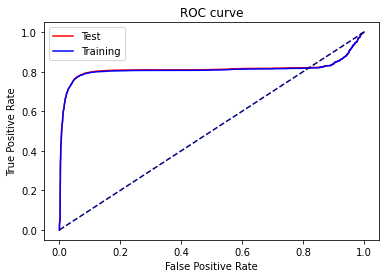

In [83]:
lr_pipeline.fit(X_train,y_train)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

yprobability_test= lr_pipeline.predict_proba(X_test)
yprobability_train = lr_pipeline.predict_proba(X_train)

def roc(y, prob):
    fpr, tpr, _ = roc_curve(y, prob,pos_label='MIDNIGHT')
    return fpr, tpr
fpr_test, tpr_test = roc(y_test,yprobability_test[:,1])
fpr_train, tpr_train = roc(y_train, yprobability_train[:,1])
#auc = roc_auc_score(y_test, yprobability_test[:,1], multi_class = 'ovr')
plt.plot(fpr_test, tpr_test,'-r')
plt.plot(fpr_train, tpr_train,'-b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(['Test','Training'])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

In [93]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test,yprobability_test,multi_class = 'ovr')
auc_score2 = roc_auc_score(y_train, yprobability_train,multi_class = 'ovr')

print(auc_score1, auc_score2)

0.9092546357060701 0.9083010816422582


From the graph, precision is observed to be highest for MIDNIGHT category, whereas NIGHT category is least for recall metric

The AUC for train is 90.8% and for test data is 90.9 percent.

# RandomForest

In [20]:
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.model_selection import GridSearchCV
rf_pipe = modeling_pipeline = Pipeline([
        ('data_processing', processing_pipeline),
        ('rf', RandomForestClassifier())
        ])
        
param_grid_rf = [{'rf__max_depth': [5, 10, 15],
               'rf__n_estimators': [10, 50, 100],
               'rf__max_samples': [1000, 2000, 5000]
              }]

gcv_rf = GridSearchCV(estimator=rf_pipe, param_grid=param_grid_rf, scoring='recall_macro', refit=True,verbose=10)
gcv_rf = gcv_rf.fit(X_train, y_train)
print(gcv_rf.best_estimator_)
print("\n")
print(f'Validation score: {gcv_rf.best_score_:.2%}')
print(f'Test score: {gcv_rf.score(X_test, y_test):.2%}')

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5; 1/27] START rf__max_depth=5, rf__max_samples=1000, rf__n_estimators=10.
[CV 1/5; 1/27] END rf__max_depth=5, rf__max_samples=1000, rf__n_estimators=10;, score=0.506 total time=   3.2s
[CV 2/5; 1/27] START rf__max_depth=5, rf__max_samples=1000, rf__n_estimators=10.
[CV 2/5; 1/27] END rf__max_depth=5, rf__max_samples=1000, rf__n_estimators=10;, score=0.633 total time=   3.0s
[CV 3/5; 1/27] START rf__max_depth=5, rf__max_samples=1000, rf__n_estimators=10.
[CV 3/5; 1/27] END rf__max_depth=5, rf__max_samples=1000, rf__n_estimators=10;, score=0.496 total time=   3.0s
[CV 4/5; 1/27] START rf__max_depth=5, rf__max_samples=1000, rf__n_estimators=10.
[CV 4/5; 1/27] END rf__max_depth=5, rf__max_samples=1000, rf__n_estimators=10;, score=0.532 total time=   3.0s
[CV 5/5; 1/27] START rf__max_depth=5, rf__max_samples=1000, rf__n_estimators=10.
[CV 5/5; 1/27] END rf__max_depth=5, rf__max_samples=1000, rf__n_estimators=10;, score=0.3

[CV 3/5; 9/27] END rf__max_depth=5, rf__max_samples=5000, rf__n_estimators=100;, score=0.658 total time=   7.7s
[CV 4/5; 9/27] START rf__max_depth=5, rf__max_samples=5000, rf__n_estimators=100
[CV 4/5; 9/27] END rf__max_depth=5, rf__max_samples=5000, rf__n_estimators=100;, score=0.467 total time=   7.8s
[CV 5/5; 9/27] START rf__max_depth=5, rf__max_samples=5000, rf__n_estimators=100
[CV 5/5; 9/27] END rf__max_depth=5, rf__max_samples=5000, rf__n_estimators=100;, score=0.667 total time=   7.6s
[CV 1/5; 10/27] START rf__max_depth=10, rf__max_samples=1000, rf__n_estimators=10
[CV 1/5; 10/27] END rf__max_depth=10, rf__max_samples=1000, rf__n_estimators=10;, score=0.741 total time=   3.1s
[CV 2/5; 10/27] START rf__max_depth=10, rf__max_samples=1000, rf__n_estimators=10
[CV 2/5; 10/27] END rf__max_depth=10, rf__max_samples=1000, rf__n_estimators=10;, score=0.669 total time=   3.1s
[CV 3/5; 10/27] START rf__max_depth=10, rf__max_samples=1000, rf__n_estimators=10
[CV 3/5; 10/27] END rf__max_de

[CV 5/5; 17/27] END rf__max_depth=10, rf__max_samples=5000, rf__n_estimators=50;, score=0.927 total time=   5.9s
[CV 1/5; 18/27] START rf__max_depth=10, rf__max_samples=5000, rf__n_estimators=100
[CV 1/5; 18/27] END rf__max_depth=10, rf__max_samples=5000, rf__n_estimators=100;, score=0.931 total time=   9.1s
[CV 2/5; 18/27] START rf__max_depth=10, rf__max_samples=5000, rf__n_estimators=100
[CV 2/5; 18/27] END rf__max_depth=10, rf__max_samples=5000, rf__n_estimators=100;, score=0.914 total time=   9.0s
[CV 3/5; 18/27] START rf__max_depth=10, rf__max_samples=5000, rf__n_estimators=100
[CV 3/5; 18/27] END rf__max_depth=10, rf__max_samples=5000, rf__n_estimators=100;, score=0.855 total time=   9.2s
[CV 4/5; 18/27] START rf__max_depth=10, rf__max_samples=5000, rf__n_estimators=100
[CV 4/5; 18/27] END rf__max_depth=10, rf__max_samples=5000, rf__n_estimators=100;, score=0.826 total time=   9.3s
[CV 5/5; 18/27] START rf__max_depth=10, rf__max_samples=5000, rf__n_estimators=100
[CV 5/5; 18/27] 

[CV 2/5; 26/27] END rf__max_depth=15, rf__max_samples=5000, rf__n_estimators=50;, score=0.984 total time=   6.9s
[CV 3/5; 26/27] START rf__max_depth=15, rf__max_samples=5000, rf__n_estimators=50
[CV 3/5; 26/27] END rf__max_depth=15, rf__max_samples=5000, rf__n_estimators=50;, score=0.978 total time=   6.7s
[CV 4/5; 26/27] START rf__max_depth=15, rf__max_samples=5000, rf__n_estimators=50
[CV 4/5; 26/27] END rf__max_depth=15, rf__max_samples=5000, rf__n_estimators=50;, score=0.991 total time=   6.8s
[CV 5/5; 26/27] START rf__max_depth=15, rf__max_samples=5000, rf__n_estimators=50
[CV 5/5; 26/27] END rf__max_depth=15, rf__max_samples=5000, rf__n_estimators=50;, score=0.996 total time=   6.8s
[CV 1/5; 27/27] START rf__max_depth=15, rf__max_samples=5000, rf__n_estimators=100
[CV 1/5; 27/27] END rf__max_depth=15, rf__max_samples=5000, rf__n_estimators=100;, score=0.985 total time=  11.2s
[CV 2/5; 27/27] START rf__max_depth=15, rf__max_samples=5000, rf__n_estimators=100
[CV 2/5; 27/27] END rf

There is drastic increase in the validation and test score when compared with logistic regression.

The model picked the max depth as 15 for best validation .

In [21]:
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.model_selection import GridSearchCV
rf_pipe = modeling_pipeline = Pipeline([
        ('data_processing', processing_pipeline),
        ('rf', RandomForestClassifier())
        ])
        
param_grid_rf = [{'rf__max_depth': [12, 15, 17],
               'rf__n_estimators': [10, 50, 100],
               'rf__max_samples': [1000, 2000, 5000]
              }]

gcv_rf = GridSearchCV(estimator=rf_pipe, param_grid=param_grid_rf, scoring='recall_macro', refit=True,verbose=10)
gcv_rf = gcv_rf.fit(X_train, y_train)
print(gcv_rf.best_estimator_)
print("\n")
print(f'Validation score: {gcv_rf.best_score_:.2%}')
print(f'Test score: {gcv_rf.score(X_test, y_test):.2%}')

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5; 1/27] START rf__max_depth=12, rf__max_samples=1000, rf__n_estimators=10
[CV 1/5; 1/27] END rf__max_depth=12, rf__max_samples=1000, rf__n_estimators=10;, score=0.790 total time=   3.2s
[CV 2/5; 1/27] START rf__max_depth=12, rf__max_samples=1000, rf__n_estimators=10
[CV 2/5; 1/27] END rf__max_depth=12, rf__max_samples=1000, rf__n_estimators=10;, score=0.768 total time=   3.2s
[CV 3/5; 1/27] START rf__max_depth=12, rf__max_samples=1000, rf__n_estimators=10
[CV 3/5; 1/27] END rf__max_depth=12, rf__max_samples=1000, rf__n_estimators=10;, score=0.683 total time=   3.2s
[CV 4/5; 1/27] START rf__max_depth=12, rf__max_samples=1000, rf__n_estimators=10
[CV 4/5; 1/27] END rf__max_depth=12, rf__max_samples=1000, rf__n_estimators=10;, score=0.941 total time=   3.2s
[CV 5/5; 1/27] START rf__max_depth=12, rf__max_samples=1000, rf__n_estimators=10
[CV 5/5; 1/27] END rf__max_depth=12, rf__max_samples=1000, rf__n_estimators=10;, scor

[CV 3/5; 9/27] END rf__max_depth=12, rf__max_samples=5000, rf__n_estimators=100;, score=0.944 total time=  10.1s
[CV 4/5; 9/27] START rf__max_depth=12, rf__max_samples=5000, rf__n_estimators=100
[CV 4/5; 9/27] END rf__max_depth=12, rf__max_samples=5000, rf__n_estimators=100;, score=0.960 total time=  10.1s
[CV 5/5; 9/27] START rf__max_depth=12, rf__max_samples=5000, rf__n_estimators=100
[CV 5/5; 9/27] END rf__max_depth=12, rf__max_samples=5000, rf__n_estimators=100;, score=0.959 total time=   9.9s
[CV 1/5; 10/27] START rf__max_depth=15, rf__max_samples=1000, rf__n_estimators=10
[CV 1/5; 10/27] END rf__max_depth=15, rf__max_samples=1000, rf__n_estimators=10;, score=0.938 total time=   3.2s
[CV 2/5; 10/27] START rf__max_depth=15, rf__max_samples=1000, rf__n_estimators=10
[CV 2/5; 10/27] END rf__max_depth=15, rf__max_samples=1000, rf__n_estimators=10;, score=0.892 total time=   3.2s
[CV 3/5; 10/27] START rf__max_depth=15, rf__max_samples=1000, rf__n_estimators=10
[CV 3/5; 10/27] END rf__m

[CV 5/5; 17/27] END rf__max_depth=15, rf__max_samples=5000, rf__n_estimators=50;, score=0.973 total time=   6.9s
[CV 1/5; 18/27] START rf__max_depth=15, rf__max_samples=5000, rf__n_estimators=100
[CV 1/5; 18/27] END rf__max_depth=15, rf__max_samples=5000, rf__n_estimators=100;, score=0.993 total time=  11.0s
[CV 2/5; 18/27] START rf__max_depth=15, rf__max_samples=5000, rf__n_estimators=100
[CV 2/5; 18/27] END rf__max_depth=15, rf__max_samples=5000, rf__n_estimators=100;, score=0.975 total time=  11.1s
[CV 3/5; 18/27] START rf__max_depth=15, rf__max_samples=5000, rf__n_estimators=100
[CV 3/5; 18/27] END rf__max_depth=15, rf__max_samples=5000, rf__n_estimators=100;, score=0.957 total time=  11.2s
[CV 4/5; 18/27] START rf__max_depth=15, rf__max_samples=5000, rf__n_estimators=100
[CV 4/5; 18/27] END rf__max_depth=15, rf__max_samples=5000, rf__n_estimators=100;, score=0.991 total time=  11.0s
[CV 5/5; 18/27] START rf__max_depth=15, rf__max_samples=5000, rf__n_estimators=100
[CV 5/5; 18/27] 

[CV 2/5; 26/27] END rf__max_depth=17, rf__max_samples=5000, rf__n_estimators=50;, score=0.990 total time=   7.2s
[CV 3/5; 26/27] START rf__max_depth=17, rf__max_samples=5000, rf__n_estimators=50
[CV 3/5; 26/27] END rf__max_depth=17, rf__max_samples=5000, rf__n_estimators=50;, score=0.997 total time=   7.2s
[CV 4/5; 26/27] START rf__max_depth=17, rf__max_samples=5000, rf__n_estimators=50
[CV 4/5; 26/27] END rf__max_depth=17, rf__max_samples=5000, rf__n_estimators=50;, score=0.985 total time=   7.2s
[CV 5/5; 26/27] START rf__max_depth=17, rf__max_samples=5000, rf__n_estimators=50
[CV 5/5; 26/27] END rf__max_depth=17, rf__max_samples=5000, rf__n_estimators=50;, score=0.996 total time=   7.1s
[CV 1/5; 27/27] START rf__max_depth=17, rf__max_samples=5000, rf__n_estimators=100
[CV 1/5; 27/27] END rf__max_depth=17, rf__max_samples=5000, rf__n_estimators=100;, score=0.980 total time=  12.2s
[CV 2/5; 27/27] START rf__max_depth=17, rf__max_samples=5000, rf__n_estimators=100
[CV 2/5; 27/27] END rf

By searching with multiple other max_depths , i have observed the model remained constant for max depth=17. So , will be using this to get the classification report.

In [24]:
from sklearn.metrics import classification_report
rf_model = Pipeline([('processing_pipeline', processing_pipeline),
                    ('model', RandomForestClassifier(max_depth=17, max_samples=5000, n_estimators=100))])
rf_model.fit(X_train,y_train)
rf_predict= rf_model.predict(X_train)
print(classification_report(y_train, rf_predict))

              precision    recall  f1-score   support

         DAY       1.00      1.00      1.00    418671
    MIDNIGHT       1.00      0.97      0.98    190255
       NIGHT       0.97      1.00      0.99    167043

    accuracy                           0.99    775969
   macro avg       0.99      0.99      0.99    775969
weighted avg       0.99      0.99      0.99    775969



From above report, we cna say accuracy is 99 percent , recall,precision,f1-score is 100%.

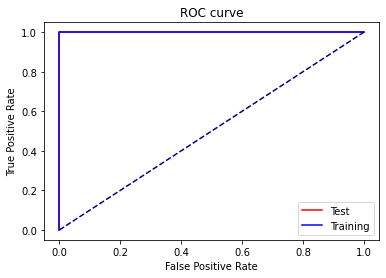

In [27]:
rf_pipe.fit(X_train,y_train)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

yprobability_test= rf_pipe.predict_proba(X_test)
yprobability_train = rf_pipe.predict_proba(X_train)

def roc(y, prob):
    fpr, tpr, _ = roc_curve(y, prob,pos_label='MIDNIGHT')
    return fpr, tpr
fpr_test, tpr_test = roc(y_test,yprobability_test[:,1])
fpr_train, tpr_train = roc(y_train, yprobability_train[:,1])
#auc = roc_auc_score(y_test, yprobability_test[:,1], multi_class = 'ovr')
plt.plot(fpr_test, tpr_test,'-r')
plt.plot(fpr_train, tpr_train,'-b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(['Test','Training'])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

In [28]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test,yprobability_test,multi_class = 'ovr')
auc_score2 = roc_auc_score(y_train, yprobability_train,multi_class = 'ovr')

print(auc_score1, auc_score2)

1.0 1.0


Observations:


we see, the precision is highest for the MIDNIGHT category whereas least is 97 for NIGHT Category

The AUC are 100%

# RECOMMENDATION MODEL

I couldnt give proper conclusion because my randomforest AUC and validation are nearly 100, that means there might be overfitting concern in the dataset which i have used.
But Overall, 
I would recommend to use RandomForest model as it has the highest accuracy and AUC score. Also, RandomForest is the better approach if there is lots of imbalances in the data. And most of my data is categorical type, So, Randomforest performs much better than logistic regression for categorical data.

